In [ ]:
!pip install mlphys

In [2]:
from mlphys.lgoam.utils.Imaging import Save
from mlphys.lgoam.utils.Noise import Noise_Dist
from mlphys.lgoam.source.OAM_Intensity_Phase import LG_Lights_Tensorflow
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

Only Two lines of code, and that's all.



```
1. intensity_list,phase_list = lg.Non_Superposition(p_l_array = p_and_l_set_np,w=0.00015, grating_period=0,save_image=False,numpy_array=False)

2. Noise_Dist().Guassian_Noise_Batch(intensity_list,multiple=200,factor=5e5)
```




In [3]:
lg = LG_Lights_Tensorflow(xpixel=256,ypixel=256,dT=8e-6,verbose=True)


## 1 Non-superposition LG States
### 1. 1 We can generate as many as LG non-superposition modes simultaneously using GPU. 
### *Code accepts both 'numpy arrays' and 'tensors' as inputs.

In [4]:
''' First column represents the p, whereas second column represents an OAM value'''

p_set = np.random.randint(0,2,25)
l_set = np.arange(25)
p_and_l_set_np = np.stack([p_set,l_set],axis=1)

print ('|inputs as numpy array:', p_and_l_set_np)
p_and_l_set_tensor = tf.constant(p_and_l_set_np)
print ('|inputs as numpy array:', p_and_l_set_tensor)


|inputs as numpy array: [[ 0  0]
 [ 0  1]
 [ 1  2]
 [ 0  3]
 [ 0  4]
 [ 1  5]
 [ 1  6]
 [ 0  7]
 [ 0  8]
 [ 0  9]
 [ 1 10]
 [ 1 11]
 [ 0 12]
 [ 1 13]
 [ 0 14]
 [ 1 15]
 [ 1 16]
 [ 0 17]
 [ 0 18]
 [ 1 19]
 [ 0 20]
 [ 0 21]
 [ 0 22]
 [ 1 23]
 [ 0 24]]
|inputs as numpy array: tf.Tensor(
[[ 0  0]
 [ 0  1]
 [ 1  2]
 [ 0  3]
 [ 0  4]
 [ 1  5]
 [ 1  6]
 [ 0  7]
 [ 0  8]
 [ 0  9]
 [ 1 10]
 [ 1 11]
 [ 0 12]
 [ 1 13]
 [ 0 14]
 [ 1 15]
 [ 1 16]
 [ 0 17]
 [ 0 18]
 [ 1 19]
 [ 0 20]
 [ 0 21]
 [ 0 22]
 [ 1 23]
 [ 0 24]], shape=(25, 2), dtype=int64)


### 1. 2 ''' with numpy array as the input'''

Total size of OAM modes:  tf.Tensor([ 25 256 256], shape=(3,), dtype=int32)


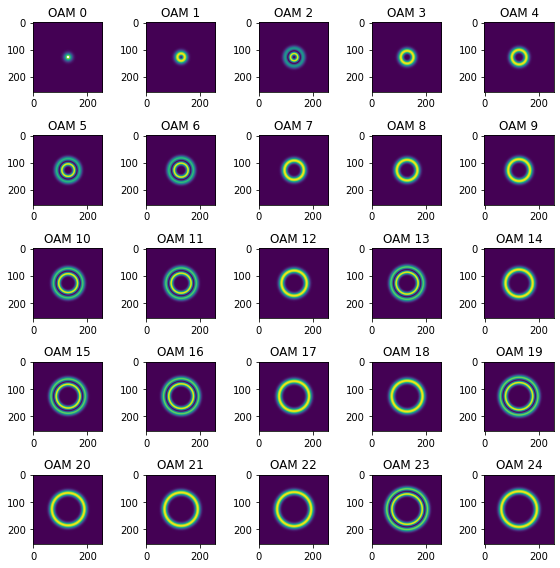

In [5]:
lg.verbose = False
intensity_list,phase_list = lg.Non_Superposition(p_l_array = p_and_l_set_np,w=0.00015,
                                                 grating_period=0,save_image=False) # for saving images, turn on save_image

print ('Total size of OAM modes: ',tf.shape(intensity_list))
fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(8,8))
for i, axi in enumerate(ax.flat):
    axi.imshow(intensity_list[i])
    axi.set_title(f'OAM {i}')
plt.tight_layout()
plt.show()

### 1. 3 ''' with Tensor as the input'''


Total size of OAM modes:  tf.Tensor([ 25 256 256], shape=(3,), dtype=int32)


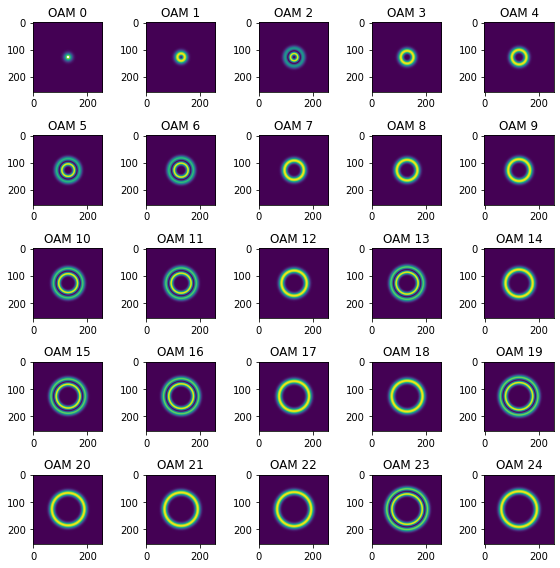

In [6]:
lg.verbose = False
intensity_list,phase_list = lg.Non_Superposition(p_l_array = p_and_l_set_tensor,w=0.00015,
                                                 grating_period=0,save_image=False) # for saving images, turn on save_image
print ('Total size of OAM modes: ',tf.shape(intensity_list))
fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(8,8))
for i, axi in enumerate(ax.flat):
    axi.imshow(intensity_list[i])
    axi.set_title(f'OAM {i}')
plt.tight_layout()
plt.show()

### 1. 4 The images can be saved in a folder easily. We just need to turn on the arg save_image  to True. 
### At the end it displays the total number of images saved in a folder 'OAM_Non_Sup_Images'.

In [7]:
lg.verbose = True
intensity_list,phase_list = lg.Non_Superposition(p_l_array = p_and_l_set_tensor,w=0.00015,
                                                 grating_period=0,save_image=True)

|Running on CPU .. .. ..
|Found P = 0, ... ...
|Found P = 0, ... ...
|Found P = 1, ... ...
|Found P = 0, ... ...
|Found P = 0, ... ...
|Found P = 1, ... ...
|Found P = 1, ... ...
|Found P = 0, ... ...
|Found P = 0, ... ...
|Found P = 0, ... ...
|Found P = 1, ... ...
|Found P = 1, ... ...
|Found P = 0, ... ...
|Found P = 1, ... ...
|Found P = 0, ... ...
|Found P = 1, ... ...
|Found P = 1, ... ...
|Found P = 0, ... ...
|Found P = 0, ... ...
|Found P = 1, ... ...
|Found P = 0, ... ...
|Found P = 0, ... ...
|Found P = 0, ... ...
|Found P = 1, ... ...
|Found P = 0, ... ...
|Total 25.0 images are saved.


### 1.5 How about Phases to be uploaded on SLMs?

Total size of OAM modes:  tf.Tensor([ 25 256 256], shape=(3,), dtype=int32)


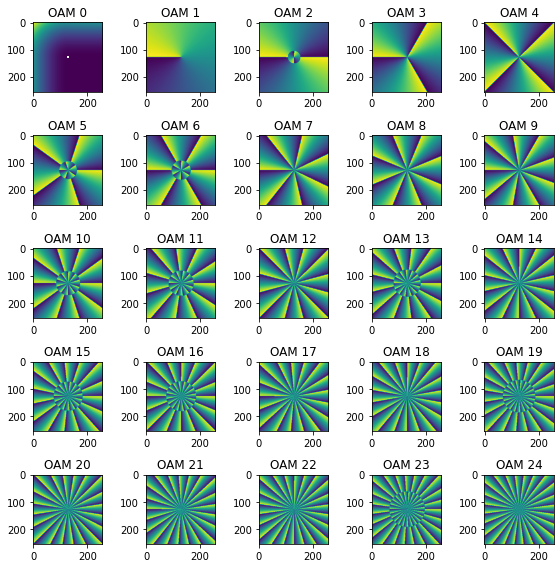

Here it might be seen that phase at OAM = 0 seems little bit weird due to numerical errors.
As you will see the maximum value for the phase at OAM = 0 is very close to zero i.e 2.2e-14 which solves the issue.
nan


In [8]:
lg.verbose = False
intensity_list,phase_list = lg.Non_Superposition(p_l_array = p_and_l_set_tensor,w=0.00015,
                                                 grating_period=0,save_image=False) # for saving images, turn on save_image
print ('Total size of OAM modes: ',tf.shape(phase_list))
fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(8,8))
for i, axi in enumerate(ax.flat):
    axi.imshow(phase_list[i])
    axi.set_title(f'OAM {i}')
plt.tight_layout()
plt.show()

print('Here it might be seen that phase at OAM = 0 seems little bit weird due to numerical errors.')
print('As you will see the maximum value for the phase at OAM = 0 is very close to zero i.e 2.2e-14 which solves the issue.')
print (np.max(phase_list[0]))

### 1.6 Let's change the grating. Its simple, just increase the grating_period in the args.


Total size of OAM modes:  tf.Tensor([ 25 256 256], shape=(3,), dtype=int32)


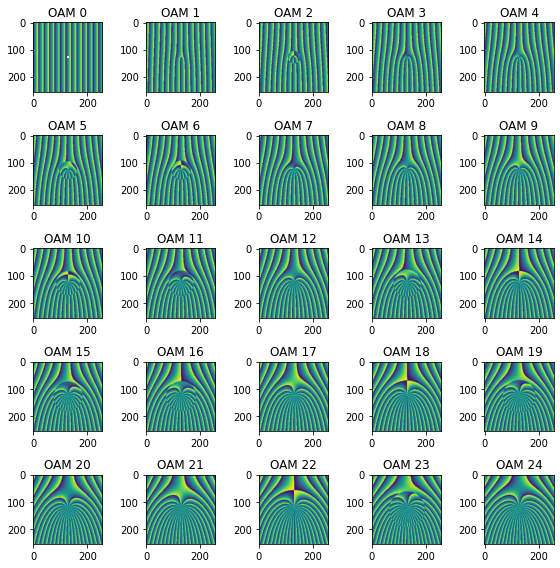

In [9]:
intensity_list,phase_list = lg.Non_Superposition(p_l_array = p_and_l_set_tensor,w=0.00015,
                                                 grating_period=20,save_image=False) # for saving images, turn on save_image
print ('Total size of OAM modes: ',tf.shape(phase_list))
fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(8,8))
for i, axi in enumerate(ax.flat):
    axi.imshow(phase_list[i])
    axi.set_title(f'OAM {i}')
plt.tight_layout()
plt.show()

### 1.7 This time we generate a bunch of noisy (white) oam images. Let's create 200 noisy images per each OAM mode
### " 25x200 OAM modes are generated in ~$\color{red}{\text{0.055 seconds. (on GPUs RTX 2060)}}$"

In [10]:
import time
time1 = time.time()
intensity_with_gaussian = Noise_Dist().Guassian_Noise_Batch(intensity_list,multiple=200,factor=5e5)
time2 = time.time()
print ('|Computation Time: ', time2-time1)
print (tf.shape(intensity_with_gaussian)) # Remember its a tensor not numpy array

|Computation Time:  20.062697172164917
tf.Tensor([ 25 200 256 256], shape=(4,), dtype=int32)


### 1.8 let's plot a set of noisy images to confirm everything is okay. Say for the 13th OAM mode.


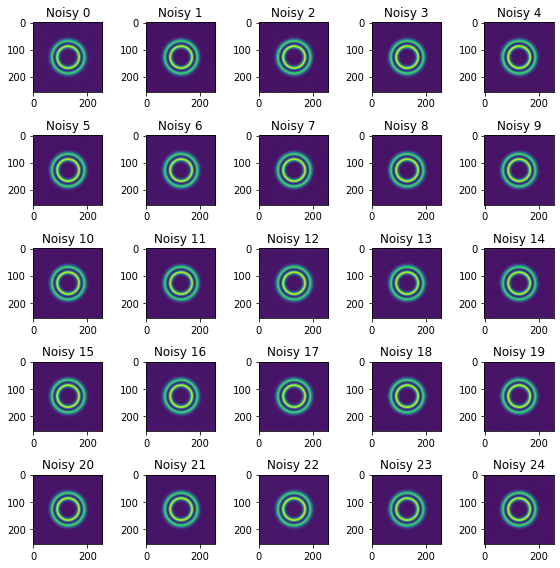

In [11]:
''' plotting only the first 25 images out of the total 100 noisy images'''

OAM_13th_mode = intensity_with_gaussian[13]

fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(8,8))
for i, axi in enumerate(ax.flat):
    axi.imshow(OAM_13th_mode[i])
    axi.set_title(f'Noisy {i}')
plt.tight_layout()
plt.show()


###  1.9 In order to Save the Intensity/Phase tensors, we only need to call 'Save_Tensor_Image' instance

In [12]:
time1 = time.time()
Save().Save_Tensor_Image(intensity_with_gaussian)
time2 = time.time()
print ('|Computation Time for saving the images: ', time2-time1)

|Rank 4 tensor is found. 25 folders are created.
|Computation Time for saving the images:  39.788554191589355


### 1.9 As previously described, the outputs are tensors. In order to have the outputs in numpy array, turn on the arg 'numpy_array True'


In [13]:
lg.verbose = False
intensity_list_tensors,phase_list_tensors = lg.Non_Superposition(p_l_array = p_and_l_set_tensor,w=0.00015,
                                                 grating_period=0,save_image=False,numpy_array=False)

intensity_list_numpy,phase_list_numpy = lg.Non_Superposition(p_l_array = p_and_l_set_tensor,w=0.00015,
                                                 grating_period=0,save_image=False,numpy_array=True)


print (type(intensity_list_tensors))
print (type(intensity_list_numpy))

<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'numpy.ndarray'>
